<center><b><h1>Current Research in Data Science</b></center>
<center><b><h3>Interpretable Machine Learning Group 3</b></center>
<br>
Team: Siddharth Bhargava, Tanveer Hannan <br>
Mentor: Chrisoph Molnar
<br>

**Problem Statement**: Bank Campaign Dataset (https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset)

#### Theory:

**Book:** https://christophm.github.io/interpretable-ml-book/

**Paper:** https://core.ac.uk/download/pdf/55631291.pdf

**Links:** https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/ 

Key Facts:

- 22 features reduced from 150 features
- Time series : May 2008 to June 2013 (we dont have the temporal information)
- Binary Classification: result is a binary successful or unsuccessful contact




In [1]:
%load_ext autoreload

import sys
sys.path.insert(0, "../src")

import os
os.chdir("../src")

##  Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
bank_data = pd.read_csv("../data/bank-additional-full.csv", sep=";")

In [4]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis before Data Cleaning

* Demographics
* Last Campaign Details
* Campaign History
* Socio-economic factors

---





#### Initial Basic *Statistics*

In [6]:
bank_data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
# check to see the number of missing values, indicated by the term "unknown"
cols = [x for x in bank_data.columns]
bank_data["contains_unknown"] = (bank_data[cols]=="unknown").any(axis="columns")
bank_data["contains_unknown"].value_counts()

/home/ubuntu/anaconda3/envs/repro/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


False    30488
True     10700
Name: contains_unknown, dtype: int64

#### Demographics

1.   Education
2.   Age
3. Job
4. Marital Status 
5. Default
6. Housing
7. Loan


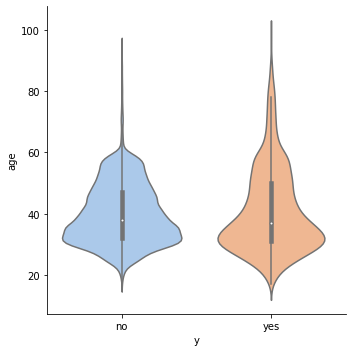

In [8]:
# age
sns.catplot(y="age", x="y", kind="violin", palette="pastel", split=True, data=bank_data)

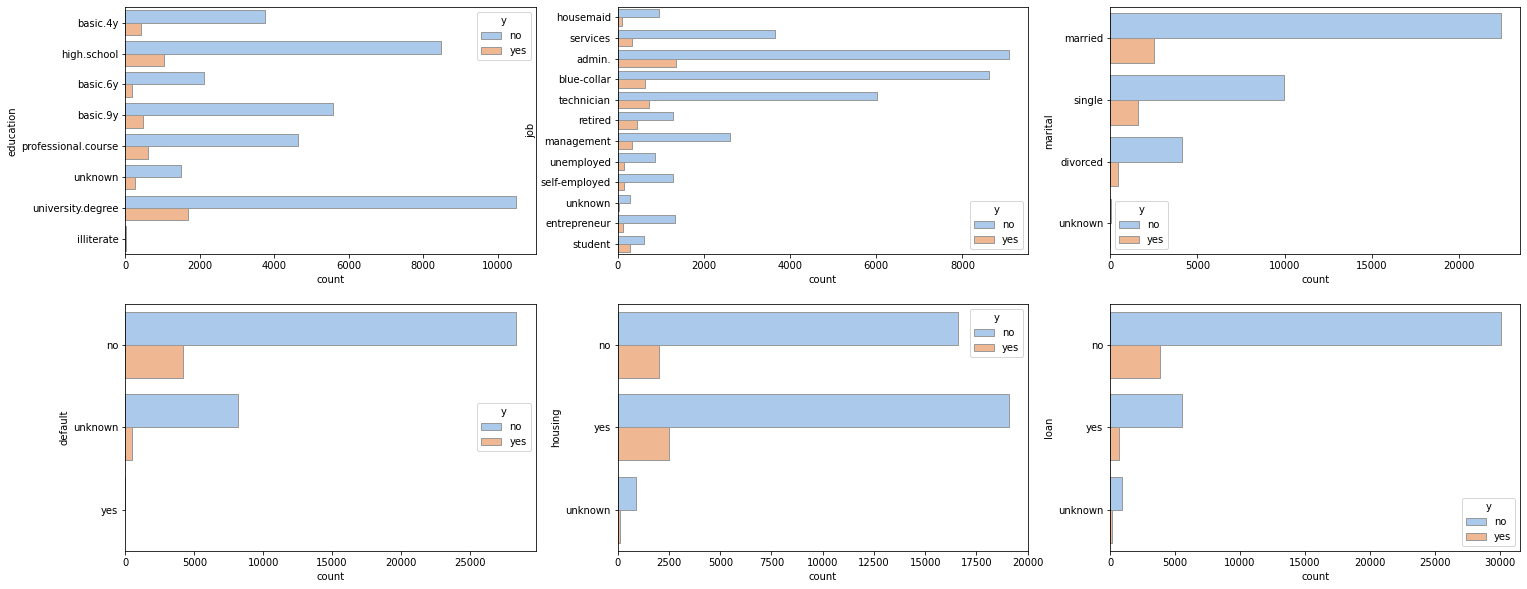

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0, 2])
sns.countplot(y="default", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1, 2])

#### Last Campaign Details

1. Contact
2. Month
3. Day of the Week
4. Duration

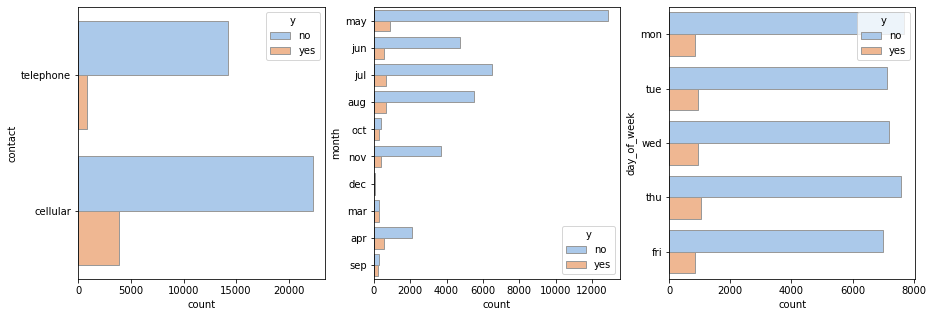

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(y="contact", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[0])
sns.countplot(y="month", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[1])
sns.countplot(y="day_of_week", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=axs[2])

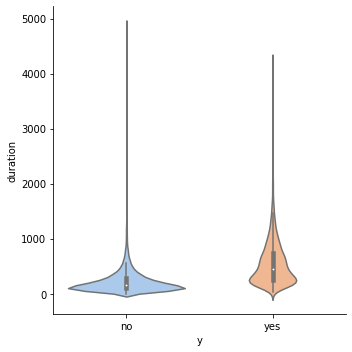

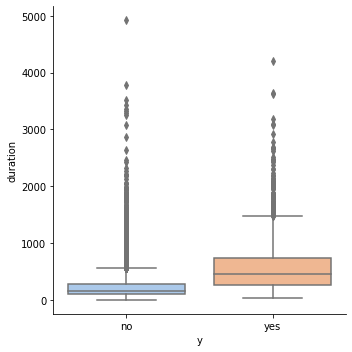

In [11]:
sns.catplot(y="duration", x="y", kind="violin", palette="pastel", split=True, data=bank_data)
sns.catplot(y="duration", x="y", kind="box", palette="pastel", data=bank_data)

#### Campaign History

1. number of contacts in this campaign
2. number of days since last campaign
3. number of contacts before this campaign
4. outcome of previous marketing campaign

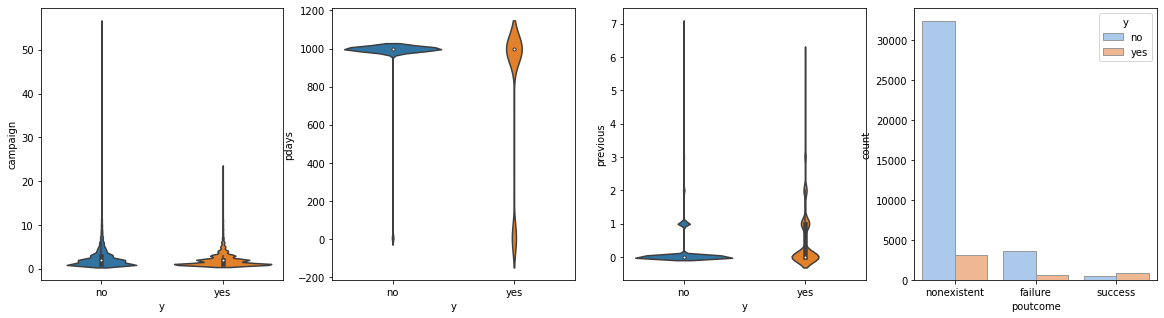

In [12]:
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(141)
sns.violinplot(x="y", y="campaign",
               data=bank_data, split=True, ax=ax)

ax = fig.add_subplot(142)
sns.violinplot(x="y", y="pdays",
               data=bank_data, split=True, ax=ax)

ax = fig.add_subplot(143)
sns.violinplot(x="y", y="previous",
               data=bank_data, split=True, ax=ax)

ax = fig.add_subplot(144)
sns.countplot(x="poutcome", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_data, ax=ax)

In [13]:
pdays_filtered = bank_data[bank_data["poutcome"] == "nonexistent"]["pdays"]
pdays_left = bank_data.loc[bank_data["poutcome"] != "nonexistent"]["pdays"]

In [14]:
pdays_filtered.unique(), len(pdays_filtered)

(array([999]), 35563)

In [15]:
pdays_left.unique(), len(pdays_left)

(array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
         12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
         20]),
 5625)

In [16]:
pdays_left.value_counts().sort_values()

20        1
25        1
26        1
27        1
21        2
19        3
22        3
18        7
17        8
16       11
0        15
8        18
14       20
15       24
1        26
11       28
13       36
5        46
10       52
12       58
7        60
2        61
9        64
4       118
6       412
3       439
999    4110
Name: pdays, dtype: int64

More than 80% of the data has "nonexistent" value and the same corresponding value of "999" as seen here. 

If we look at the other side!

#### Socio-Economic Attributes

1. Employment Variation Rate (Quarterly)
2. Consumer Price Index (Monthly)
3. Consumer Confidence Index (Monthly)
4. Euribor 3 Month Rate (Daily)
5. Number of Employees (Quarterly)

## Data Pre-processing:


#### Handling Missing Data: KNN Imputation vs MICE Imputation (Refer to Script Form)

In [17]:
# Imputation
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN, IterativeImputer

In [18]:
# create ordinal encoder
coded_bank_data = bank_data.copy()
ordinal_enc_dict = {}

col_names = ["education","job", "marital", "default", "loan", "housing", 
             "contact", "month", "day_of_week", "poutcome", "y"]

for col_name in col_names:

  ordinal_enc_dict[col_name] = OrdinalEncoder()

  col = bank_data[col_name]
  list_of_indices_not_na = []
  for i, value in enumerate(col):
    if value != "unknown": list_of_indices_not_na.append(i)

  col = col.replace({"unknown": np.nan})
  col_notna = col[col.notna()]
  reshaped_colvalues = col_notna.values.reshape(-1,1)

  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_colvalues)

  for i, value in enumerate(list_of_indices_not_na):
    
    coded_bank_data[col_name][value] = encoded_vals[i]

<ipython-input-18-32ff91b0a708>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coded_bank_data[col_name][value] = encoded_vals[i]
<ipython-input-18-32ff91b0a708>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coded_bank_data[col_name][value] = encoded_vals[i]
<ipython-input-18-32ff91b0a708>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coded_bank_data[col_name][value] = encoded_vals[i]
<ipython-input-18-32ff91b0a708>:25: Sett

In [19]:
coded_bank_data = coded_bank_data.replace({"unknown": np.nan})

/home/ubuntu/anaconda3/envs/repro/lib/python3.8/site-packages/pandas/core/internals/managers.py:1911: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [20]:
coded_bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contains_unknown
0,56,[3.0],[1.0],[0.0],[0.0],[0.0],[0.0],[1.0],[6.0],[1.0],...,999,0,[1.0],1.1,93.994,-36.4,4.857,5191.0,[0.0],False
1,57,[7.0],[1.0],[3.0],NaN,[0.0],[0.0],[1.0],[6.0],[1.0],...,999,0,[1.0],1.1,93.994,-36.4,4.857,5191.0,[0.0],True
2,37,[7.0],[1.0],[3.0],[0.0],[1.0],[0.0],[1.0],[6.0],[1.0],...,999,0,[1.0],1.1,93.994,-36.4,4.857,5191.0,[0.0],False
3,40,[0.0],[1.0],[1.0],[0.0],[0.0],[0.0],[1.0],[6.0],[1.0],...,999,0,[1.0],1.1,93.994,-36.4,4.857,5191.0,[0.0],False
4,56,[7.0],[1.0],[3.0],[0.0],[0.0],[1.0],[1.0],[6.0],[1.0],...,999,0,[1.0],1.1,93.994,-36.4,4.857,5191.0,[0.0],False


In [21]:
KNN_Imputer = KNN()

bank_data_imp = coded_bank_data.copy(deep=True)

bank_data_imp.iloc[:,:] = np.round(KNN_Imputer.fit_transform(bank_data_imp))

for col in col_names:

  reshaped_col = bank_data_imp[col].values.reshape(-1, 1)
  bank_data_imp[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col) 

Imputing row 1/41188 with 0 missing, elapsed time: 381.550
Imputing row 101/41188 with 1 missing, elapsed time: 381.571
Imputing row 201/41188 with 0 missing, elapsed time: 381.590
Imputing row 301/41188 with 1 missing, elapsed time: 381.604
Imputing row 401/41188 with 0 missing, elapsed time: 381.618
Imputing row 501/41188 with 1 missing, elapsed time: 381.640
Imputing row 601/41188 with 0 missing, elapsed time: 381.663
Imputing row 701/41188 with 0 missing, elapsed time: 381.676
Imputing row 801/41188 with 1 missing, elapsed time: 381.695
Imputing row 901/41188 with 0 missing, elapsed time: 381.708
Imputing row 1001/41188 with 0 missing, elapsed time: 381.726
Imputing row 1101/41188 with 0 missing, elapsed time: 381.744
Imputing row 1201/41188 with 0 missing, elapsed time: 381.759
Imputing row 1301/41188 with 0 missing, elapsed time: 381.771
Imputing row 1401/41188 with 1 missing, elapsed time: 381.781
Imputing row 1501/41188 with 0 missing, elapsed time: 381.792
Imputing row 1601/41

Imputing row 14801/41188 with 0 missing, elapsed time: 383.633
Imputing row 14901/41188 with 0 missing, elapsed time: 383.641
Imputing row 15001/41188 with 0 missing, elapsed time: 383.651
Imputing row 15101/41188 with 1 missing, elapsed time: 383.663
Imputing row 15201/41188 with 1 missing, elapsed time: 383.677
Imputing row 15301/41188 with 0 missing, elapsed time: 383.692
Imputing row 15401/41188 with 0 missing, elapsed time: 383.700
Imputing row 15501/41188 with 0 missing, elapsed time: 383.710
Imputing row 15601/41188 with 0 missing, elapsed time: 383.720
Imputing row 15701/41188 with 1 missing, elapsed time: 383.729
Imputing row 15801/41188 with 0 missing, elapsed time: 383.737
Imputing row 15901/41188 with 0 missing, elapsed time: 383.748
Imputing row 16001/41188 with 1 missing, elapsed time: 383.762
Imputing row 16101/41188 with 0 missing, elapsed time: 383.775
Imputing row 16201/41188 with 0 missing, elapsed time: 383.786
Imputing row 16301/41188 with 0 missing, elapsed time: 

Imputing row 30901/41188 with 0 missing, elapsed time: 385.079
Imputing row 31001/41188 with 0 missing, elapsed time: 385.086
Imputing row 31101/41188 with 0 missing, elapsed time: 385.092
Imputing row 31201/41188 with 0 missing, elapsed time: 385.099
Imputing row 31301/41188 with 0 missing, elapsed time: 385.109
Imputing row 31401/41188 with 0 missing, elapsed time: 385.118
Imputing row 31501/41188 with 1 missing, elapsed time: 385.126
Imputing row 31601/41188 with 0 missing, elapsed time: 385.133
Imputing row 31701/41188 with 0 missing, elapsed time: 385.140
Imputing row 31801/41188 with 0 missing, elapsed time: 385.148
Imputing row 31901/41188 with 0 missing, elapsed time: 385.156
Imputing row 32001/41188 with 0 missing, elapsed time: 385.163
Imputing row 32101/41188 with 0 missing, elapsed time: 385.173
Imputing row 32201/41188 with 0 missing, elapsed time: 385.180
Imputing row 32301/41188 with 0 missing, elapsed time: 385.188
Imputing row 32401/41188 with 1 missing, elapsed time: 

#### Compare the two imputed files: KNN and MICE

In [22]:
bank_knn.equals(bank_mice)

NameError: name 'bank_knn' is not defined

In [23]:
df_diff = bank_knn.eq(bank_mice)

NameError: name 'bank_knn' is not defined

In [24]:
cols = [x for x in df_diff.columns]
df_diff["contains_difference"] = (df_diff[cols]==False).any(axis="columns")
df_diff["contains_difference"].value_counts()

NameError: name 'df_diff' is not defined

#### Binning Duration:


In [25]:
bank_bin_dur = bank_raw.copy()
sns.catplot(y="duration", x="y", kind="box", palette="pastel", data=bank_bin_dur)

NameError: name 'bank_raw' is not defined

In [26]:
# remove some of the outliers
q = bank_bin_dur["duration"].quantile(0.995)
bank_bin_dur =  bank_bin_dur[bank_bin_dur["duration"] <= q]
print(len(bank_raw))
print(len(bank_bin_dur))
sns.catplot(y="duration", x="y", kind="box", palette="pastel", data=bank_bin_dur)

NameError: name 'bank_bin_dur' is not defined

In [ ]:
# Equi-Height Bins: create bins having equal height and varied range. This one works in deciles

# bin_labels = [0,1,2,3,4,5,6,7,8,9]
# bank_bin_dur["eqht_dur_10"] = pd.qcut(bank_bin_dur['duration'], q=10, labels=bin_labels, precision=0)b

In [27]:
# Custom Bins: define your own bins! Preferred method
cut_labels_4 = ['less than 200', '200 - 400', '400 - 800', 'more than 800']
cut_bins = [0, 200, 400, 800, 200000]
bank_bin_dur["eqwd_dur_4"] = pd.cut(bank_bin_dur['duration'], bins=cut_bins, labels=cut_labels_4)

NameError: name 'bank_bin_dur' is not defined

In [28]:
bank_bin_dur.head()

NameError: name 'bank_bin_dur' is not defined

#### Define Feature Embedding for Campaign History using Autoencoders: (Discontinued for now)

For the 4 features within the Campaign History, we believe there is a lot of redundancy and thus in order to simlify and condense the information, we suggest using an autoencoder to extract the useful information from these set of features and make a new feature representation which would preserve the information and avoid redundancy. 

The four features are: 

- number of contacts made in this campaign: numeric
- number of days between last contact and current contact: numeric
- number of contacts made before this campaign:  numeric
- Outcome of the previous campaign: categorical

We want to embed this information. Consider PCA and vanilla autoencoders.

In [29]:
bank_mice.head()

NameError: name 'bank_mice' is not defined

In [30]:
# import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

from sklearn import preprocessing

ModuleNotFoundError: No module named 'torch'

In [ ]:
def load_data(data):
  '''
  TODO: subset data to the four columns. 
        Convert 999 to -99? 
        labelEncode Outcome
        Standarize the other variables?
  '''
  camp_history = data["campaign", "pdays", "previous", "poutcome"]
  camp_history["pdays"].replace({999: -99}, inplace=True)
  

  return None

In [ ]:
def numpyToTensor(x):
    x_train = torch.from_numpy(x).to(device)
    return x_train

In [ ]:
test_data = bank_mice.copy()

In [ ]:
test_data["pdays"].replace({999: np.nan}, inplace=True)

In [ ]:
test_data["pdays"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler1 = StandardScaler()

x1 = test_data["pdays"].values.reshape(test_data["pdays"].shape[0],1).astype('float32')
scaler1.fit(x1)
scaler1.transform(x1)
np.std(scaler1.transform(x1))

In [ ]:
scaler1.mean_

In [ ]:
scaler2 = StandardScaler()

x2 = test_data["campaign"].values.reshape(test_data["campaign"].shape[0],1).astype('float32')
scaler2.fit(x2)
scaler2.mean_
scaler2.transform(x2)

In [ ]:
scaler2.mean_

In [ ]:
scaler3 = StandardScaler()

x3 = test_data["previous"].values.reshape(test_data["previous"].shape[0],1).astype('float32')
scaler3.fit(x3)
scaler3.transform(x3)

In [ ]:
scaler3.mean_

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
outcome = test_data["poutcome"].values.reshape(test_data["poutcome"].shape[0],1)
enc = OneHotEncoder()
enc.fit(outcome)
enc_outcome = enc.transform(outcome).toarray()

In [ ]:
enc.categories_

In [ ]:
enc_outcome

#### Cleaning Pipeline:

1. Imputation
2. Duplicate removal
3. Duration Binning and Outlier Removal (/pdays binning)
4. Drop non-relevant features ~ pdays, default, contact
5. Reduce Education Label Space
6. Encode Categorical Features
7. Normalize/Standardise Numeric Features

In [ ]:
# read data
bank_raw = pd.read_csv("bank-additional-full.csv", sep=";")
bank_mice = pd.read_csv("imputed_bank_data_mice.csv", index_col=0)

bank_mice_copy = bank_mice.copy()
print(len(bank_raw))

In [ ]:
# Step 1 is executed in above section already
# Step 2: Duplicate removal
bank_mice_copy.drop_duplicates(subset=None, keep='first', inplace=True)
bank_size_dup_rem = len(bank_mice_copy)
bank_size_dup_rem

In [ ]:
# Step 3: Binning and Outlier Removal
def outlier_removal(data, column, quantile):
  q = data[column].quantile(quantile)
  return  data[data[column] < q]

def binning_function(data_col, custom_bin_range, custom_bin_labels):
  return pd.cut(data_col, bins=custom_bin_range, labels=custom_bin_labels)

In [ ]:
dur_labels_4 = ['less_than_200sec', '200sec_400sec', '400sec_800sec', 'more_than_800sec']
dur_bins = [0, 200, 400, 800, 200000]

bank_mice_copy = outlier_removal(bank_mice_copy, "duration", 0.99)
# box plots can be found in above section "Binning Duration" for reference
bank_size_out_rem = len(bank_mice_copy)
bank_mice_copy["binned_duration"] = binning_function(bank_mice_copy["duration"],
                                                     dur_bins, dur_labels_4)
bank_mice_copy.head()

In [ ]:
print("Number of rows removed by outlier filtering:", bank_size_dup_rem - bank_size_out_rem)

In [ ]:
# Step 4: Dropping non-relevant columns as per initial EDA

# drop default as it doesn't contribute any information. No "yes" label exists!!!
# drop pdays as "999" dominates the label. around 95% of the entries. 
# The remaining entries have yes and no almost similarly distributed.
bank_mice_copy.drop(columns=["default", "pdays"], inplace=True)

In [ ]:
# Step 5: Modify categorical features

# reduce education label space
bank_mice_copy.loc[bank_mice_copy['education'] == 'basic.9y','education'] = 'basic'
bank_mice_copy.loc[bank_mice_copy['education'] == 'basic.6y','education'] = 'basic'
bank_mice_copy.loc[bank_mice_copy['education'] == 'basic.4y','education'] = 'basic'
bank_mice_copy['education'] = bank_mice_copy['education'].str.replace('.','')

# clean job labels
bank_mice_copy['job'] = bank_mice_copy['job'].str.replace('.','')

bank_mice_eda = bank_mice_copy.copy()
bank_mice_copy.head()

In [ ]:
bank_mice_copy.dtypes

In [ ]:
# Step 6: Encoding for Categorical Features
def encode_multi_label_features(data, columns):
  return pd.get_dummies(data, columns = columns)

def encode_bin_label_features(data, columns):
  return pd.get_dummies(data, columns = columns, drop_first=True)

In [ ]:
# there will be no binned_duration if we decide not to bin duration, and consequently drop duration!
multi_cat_features = ["job", "marital", "education",
                "month", "day_of_week", "poutcome", "binned_duration"]
bin_cat_features = ["housing", "loan", "contact", "y"]

bank_preprocess_one_hot = encode_multi_label_features(bank_mice_copy, multi_cat_features)
bank_preprocess_one_hot = encode_bin_label_features(bank_preprocess_one_hot, bin_cat_features)
bank_preprocess_one_hot.drop(columns=['duration'], inplace=True)

bank_preprocess_one_hot.to_csv("bank_one_hot.csv", sep=",")
bank_preprocess_one_hot.head()

In [ ]:
# Idealing should be done with Modeling
# Step 7: Normalizing/Standardizing Data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bank_model_data = pd.read_csv("bank_one_hot.csv", sep=",", index_col=0)

In [ ]:
bank_model_data.head()

In [ ]:
len(X.columns), X.columns

In [ ]:
X = bank_model_data.drop(columns=["y_yes"])
y = bank_model_data["y_yes"]
num_features = ["age", "campaign", "previous", "emp.var.rate", "cons.price.idx", 
                    "cons.conf.idx", "euribor3m", "nr.employed"]
scaler = StandardScaler(with_mean=True,with_std=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify= y)
scaler.fit(x_train[num_features])

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[num_features] = scaler.transform(x_train[num_features])
x_test_scaled[num_features] = scaler.transform(x_test[num_features])

In [ ]:
x_train_scaled

In [ ]:
x_test[num_features]

In [ ]:
x_train_scaled[0:5]

## EDA after Data Cleaning


Things to check:

- how does the distribution look after imputation, where does it change? Raw vs MICE
- Distribution of binned duration. Should the range be different?
- If pdays is binned, how does it look.

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(25,10))
sns.countplot(y="education", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 0])
sns.countplot(y="job", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 1])
sns.countplot(y="marital", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[0, 2])
sns.countplot(y="binned_duration", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 0])
sns.countplot(y="housing", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 1])
sns.countplot(y="loan", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_eda, ax=axs[1, 2])

In [ ]:
edu = pd.DataFrame()
edu["mice"] = bank_mice["education"]
edu["raw"] = bank_raw["education"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(edu))

In [ ]:
jobs = pd.DataFrame()
jobs["mice"] = bank_mice["job"]
jobs["raw"] = bank_raw["job"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(jobs))

In [ ]:
mar = pd.DataFrame()
mar["mice"] = bank_mice["marital"]
mar["raw"] = bank_raw["marital"]

fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(x="value", hue="variable", data=pd.melt(mar))

In [ ]:
# if pdays is binned

pdays_bins_labels = ["within_one_week", "within_two_weeks","within_three_weeks", "in_more_than_3_weeks", "never"]
pdays_bins_range =  [0, 7, 14, 21, 998, 999]
bank_mice_copy["pdays_binned"] = pd.cut(bank_data["pdays"], pdays_bins_range, labels=pdays_bins_labels, include_lowest=True)

In [ ]:
pdays_binned.value_counts()

In [ ]:
bank_data["pdays"].value_counts().sort_index()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(25,10))
sns.countplot(y="pdays_binned", hue="y",
            palette="pastel", edgecolor=".6",
            data=bank_mice_copy)